# <center>Project 1</center>

## <center>Classification with <em>k</em> Nearest Neighbors</center>

## Task 2: Classifying diabetes with <em>k</em>NN

<P>Together with the downloaded file containing this notebook, you should find three comma-separated values (csv) files named <code>diabetes_training.csv</code>, <code>diabetes_validation.csv</code>, and <code>diabetes_testing.csv</code>, corresponding to training, validation, and testing data, respectively. The first row of each file contains header information. Each subsequent row represents a person of <a href="https://en.wikipedia.org/wiki/Pima_people">Pima</a> Native American heritage, with feature values separated by commas. The very last column is the label, 0 or 1, which denotes whether or not that person has diabetes. The rest of the columns are, in order,</P>
<ol>
<li>Number of times pregnant</li>
<li>Plasma glucose concentration at 2 hours in an oral glucose tolerance test</li>
<li>Diastolic blood pressure (mm Hg)</li>
<li>Triceps skin fold thickness (mm)</li>
<li>2-Hour serum insulin (mu U/ml)</li>
<li>Body mass index (weight in kg/(height in m)^2)</li>
<li>Diabetes pedigree function</li>
<li>Age (years)</li>
</ol>
<P>In this task, you will work with the <em>k</em> nearest neighbors algorithm and use it to predict whether someone has diabetes based on various diagnostic measurements.</P>

<P>Write a function <code>load</code> that takes a <code>csv</code> file as input, reads in the file, and returns a tuple <code>(X, y)</code>, where <code>X</code> is a data matrix corresponding to the feature values and <code>y</code> is a vector corresponding to the labels. Your function should ignore the first (header) row of the file and it should assume that the labels are in the final column in the file.</P>

In [1]:
import numpy as np
def load(csv_file):
    """given a CSV file where each row is a data point,
    with the last column being the label and the rest being the vector,
    return a tuple consisting of two elements:
    (1) a matrix where each row is a vector, in the same order as they appear in the file
    (2) an array where the ith element is the label of the ith vector above.
    """
    data = np.loadtxt(csv_file, delimiter=',', skiprows=1) 
    X=data[:, :-1]
    y=data[:, -1]
    # Hint: Use https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
    return X, y


In [4]:
trainX, trainy=load('diabetes_training.csv')
validX, validy=load('diabetes_validation.csv')
testX, testy=load('diabetes_testing.csv')

<P>As with any code that you write, it is <em>strongly</em> recommended that you test your code. For example, with your <code>load</code> function above, you might want to invoke the function on one of the diabetes files and print out the dimensions of the returned <code>X</code> and <code>y</code> matrices as well as the first few rows of each. You can then compare this printed out information to the data in the file by opening up the file (e.g., with a spreadsheet program) and viewing the contents of the file.</P>

<P>Write a function <code>knn_predict</code> that takes three parameters, a training data matrix, the associated labels for the training data, and a testing data matrix. Using the <em>k</em> nearest neighbors algorithm, the function should return an array containing the predicted labels of each row (in order) for the testing data matrix. The function need only work for <em>k</em>=1 and the Euclidean distance metric (i.e., the L2 norm). While not part of this project, if you want to challenge yourself, implement the function so that it works for different values of <em>k</em> or different distance metrics. You should <font color='red'><em>not</em></font> perform any feature scaling in this task (that will come in Task 4 :).</P>
<P>Your function may use <code>numpy</code> functions such as <code>numpy.linalg.norm</code>, which calculates distances, but it may <font color='red'><em>not</em></font> use any functions from <code>sklearn</code>! You may use helper functions as you deem appropriate.
</P>

In [36]:
import numpy as np

def knn_predict(trainX, trainy, testX, k):
    """predict the labels of the testX data points
    using k=1 Nearest Neighbors and Euclidean distance, 
    and return as a vector of predictions"""
    predictions = []
    
    for test_point in testX:
        distances = []
        
        for train_point in trainX:
            distance = sum((test_point[i] - train_point[i]) ** 2 for i in range(len(test_point))) ** 0.5
            distances.append(distance)
        
        nearest_indices = np.argsort(distances)[:k]
        #print(nearest_indices)

        Nearest_pred=[trainy[i] for i in nearest_indices]
        #print(Nearest_prediction)
        
        UniqueClasses,counts=np.unique(Nearest_pred, return_counts=True)
        #print(UniqueClasses, counts)
        
        predictions.append(UniqueClasses[np.argmax(counts)])
    
    return np.array(predictions)
predictions=knn_predict(trainX, trainy, testX, k=1)


In [33]:
predictions.shape

(156,)

In [34]:
testy.shape

(156,)

<P>Write a function <code>get_accuracy</code> that takes an array of true labels and an array of predicted labels and returns the relative accuracy, i.e., the percentage of labels in common between the two arrays.</P>

In [37]:
def get_accuracy(y_true, y_predicted):
    """returns the fraction of correct predictions in y_predicted compared to y_true"""
    accuracy= ((y_true==y_predicted).sum())/len(y_true)
    
    return accuracy
accuracy=get_accuracy(testy, predictions)
print(accuracy)

0.6538461538461539


<P><font color="maroon"><u>What is the accuracy of your <em>k</em> nearest neighbors algorithm (using <em>k</em>=1 and the Euclidean distance metric) on the diabetes test data?</u></font></P>

Report your accuracy here:0.6538461538461539

## Task 3: Hyperparameter tuning with <em>k</em>NN

<P>In this task, you will use the validation data to explore the hyperparameter space of the <em>k</em>NN approach. Above, you implemented your own <em>k</em>NN classification approach. Here, we will use the <code>sklearn</code> <em>k</em>NN classification approach, as it allows setting different distance metrics and different values for <em>k</em>, which your approach may not have done. To start, write a function <code>sklearn_knn_predict</code> that uses <code>sklearn</code>'s <code>KNeighborClassifier</code> to make classification predictions. The function should have five inputs: a set of training data, a set of training labels, a set of evaluation data, a distance metric such as 'euclidean' or 'manhattan', and a value for <em>k</em>. The function should return an array of classification predictions. When creating an <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn.neighbors.KNeighborsClassifer</a> instance, you should provide three inputs: <code>algorithm='brute'</code> uses the same <em>k</em>NN algorithm that you implemented above, <code>metric=distance_metric</code> uses the distance metric provided as input to your <code>sklearn_knn_predict</code> function, and <code>n_neighbors=k</code> uses the value of <em>k</em> provided as input to your <code>sklearn_knn_predict</code> function. You should <font color='red'><em>not</em></font> perform any feature scaling in this task (that will come in Task 4 :).
</P>

In [45]:
from sklearn.neighbors import KNeighborsClassifier

def sklearn_knn_predict(trainX, trainy, validX, distance_metric, k):
    model = KNeighborsClassifier(n_neighbors=k, metric=distance_metric, algorithm='brute')
    model.fit(trainX, trainy)
    predictions=model.predict(validX)

    return predictions

predictions=sklearn_knn_predict(trainX, trainy, validX,distance_metric="euclidean",k=1)

accuracy=((validy==predictions).sum())/len(validy)
print(accuracy)

0.6993464052287581


In [47]:
# test data 
predictions=sklearn_knn_predict(trainX, trainy, testX,distance_metric="euclidean",k=1)
kNN_accuracy = ((testy==predictions).sum())/len(testy)
print('kNN accuracy is', kNN_accuracy)

kNN accuracy is 0.6538461538461539


<P><font color="maroon"><u>What is the accuracy of the <code>sklearn</code> <em>k</em> nearest neighbors algorithm (using <em>k</em>=1 and the Euclidean distance metric) on the diabetes test data?</u></font></P>

Report your accuracy here:0.6538461538461539

<P>Define a function <code>knn_grid_search</code> that takes as input the training data vectors <code>trainX</code>, the associated training labels <code>trainy</code>, the validation data <code>validationX</code>, the associated validation labels <code>validationy</code>, a list of distance metrics, and list of values for <em>k</em>. For each distance metric and value of <em>k</em>, the function should train a <em>k</em>NN classifier on the training data and test its accuracy on the validation data. It should return a dictionary mapping each <code>(metric, k)</code> tuple such as <code>('euclidean', 3)</code> to the validation accuracy for those two parameters.
</P>

In [54]:
def knn_grid_search(trainX, trainy, validationX, validationy, distance_metric_list, n_neighbors_list):
    """For each metric in distance_metric_list, and each value k in n_neighbors_list,
    trains knn classifiers with those parameters
    on the training data and computes the accuracy on the validation data.
    Returns a dictionary mapping each value of the hyperparameter pair (metric, k)
    to the accuracy with those hyperparameters on the validation data
   
    """
    results={}
    for distance_metric in distance_metric_list:
        for k in n_neighbors_list: 
            model= KNeighborsClassifier(n_neighbors=k, metric=distance_metric, algorithm='brute')
            model.fit(trainX, trainy)
            accuracy=model.score(validationX, validationy)
            results[(distance_metric,k)]=accuracy
    
    
    return results


<P>Consider two distance metrics, 'euclidean' and 'manhattan', and the following ten values for <em>k</em>: 1,3,5,7,9,11,13,15,17,19. For these possible hyperparameter values, print out the distance metric and value for <em>k</em> that correspond to the highest accuracy of the <em>k</em>NN classifier on the validation data. Also, print out the accuracy of the classifier on the <em>test</em> data using this pair of parameters.</P>

In [ ]:
n_neighbors_list=[1,3,5,7,9,11,13,15,17,19]
distance_metric_list=['euclidean', 'manhattan']

ResultDict=knn_grid_search(trainX, trainy, validX, validy, distance_metric_list, n_neighbors_list)
print(ResultDict)

In [75]:
best_accuracy=max(ResultDict.values())
best_metric = [key for key, value in ResultDict.items() if value == best_accuracy][0]  
print(best_metric,best_accuracy )

# test data 
model = KNeighborsClassifier(n_neighbors=11, metric='euclidean', algorithm='brute')
model.fit(trainX, trainy) 
test_accuracy = model.score(testX, testy)
print('Test Accuracy', test_accuracy)


('euclidean', 11) 0.7843137254901961
0.7243589743589743


In [ ]:
metric, k = 'None', 0
validation_accuracy = 0.0
print('The best parameters are metric =', metric, 'and k =', k, 'with', validation_accuracy, 'accuracy on the validation data')
test_accuracy = 0.0
print('Test accuracy:', test_accuracy)

<P>As a final step for this task, create a plot containing two line graphs, one corresponding to the accuracy of the <em>k</em>NN approach using different values of <em>k</em> with the <code>euclidean</code> distance metric, and one corresponding to the accuracy of the <em>k</em>NN approach using different values of <em>k</em> with the <code>manhattan</code> distance metric.
</P>

In [77]:
import matplotlib.pyplot as plt
ResultDict

plt.plot(x=)

for metric in ResultDict.keys():
    if 'euclidean' in metric:
        


{('euclidean', 1): 0.6993464052287581,
 ('euclidean', 3): 0.7254901960784313,
 ('euclidean', 5): 0.7516339869281046,
 ('euclidean', 7): 0.7581699346405228,
 ('euclidean', 9): 0.7712418300653595,
 ('euclidean', 11): 0.7843137254901961,
 ('euclidean', 13): 0.7581699346405228,
 ('euclidean', 15): 0.7450980392156863,
 ('euclidean', 17): 0.738562091503268,
 ('euclidean', 19): 0.738562091503268,
 ('manhattan', 1): 0.7058823529411765,
 ('manhattan', 3): 0.7058823529411765,
 ('manhattan', 5): 0.7320261437908496,
 ('manhattan', 7): 0.7254901960784313,
 ('manhattan', 9): 0.7712418300653595,
 ('manhattan', 11): 0.7843137254901961,
 ('manhattan', 13): 0.7843137254901961,
 ('manhattan', 15): 0.7712418300653595,
 ('manhattan', 17): 0.7647058823529411,
 ('manhattan', 19): 0.7777777777777778}

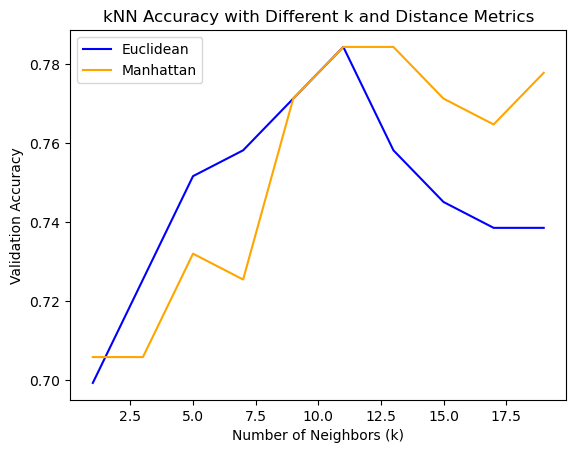

In [121]:
euclidean=[]
manhattan=[]
for metric in ResultDict.keys():
    if 'euclidean' in metric:
        K=metric[1]
        accuracy=ResultDict[metric]
        euclidean.append([K,accuracy]) 
        
    else:
        K=metric[1]
        accuracy=ResultDict[metric]
        manhattan.append([K,accuracy])
    
k_values = [value[0] for value in euclidean]  
accuracies = [value[1] for value in euclidean]  

plt.plot(k_values, accuracies, label='Euclidean', color='blue')

k_values_manhattan = [value[0] for value in manhattan] 
accuracies_manhattan = [value[1] for value in manhattan] 

plt.plot(k_values_manhattan, accuracies_manhattan, label='Manhattan', color='orange')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('kNN Accuracy with Different k and Distance Metrics')

plt.legend()
plt.show()


<P>Your plot of line graphs might looking something like this:<BR>
<center><img src="kNN.png"></img></center>

## Task 4: Feature Scaling

<P>In the tasks above, you did not perform feature scaling prior to classifying the data.  Here, you will perform feature scaling on the diabetes data before classifying it. Using the <code>fit</code> function of <code>sklearn</code>'s <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler">preprocessing.StandardScaler</a> class, you can learn the means and standard deviations of the features in the <em>training</em> data. Then, using the <code>transform</code> function on your trained <code>preprocessing.StandardScaler</code> object, you can scale first the <em>training</em> data and then the <em>testing</em> data. 
</P>

In [122]:
# Fit a preprocessing.StandardScaler object with the diabetes training data.
# Then scale (i.e., transform) first the training data and then the testing data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

trainX_scaled = scaler.fit_transform(trainX)

testX_scaled = scaler.transform(testX)




In [126]:
# Train an sklearn KNeighborsClassifier using the scaled training data
# and determine its accuracy on the scaled testing data (using k=1 and Euclidean distance).


model = KNeighborsClassifier(n_neighbors=1, metric='euclidean', algorithm='brute')
model.fit(trainX_scaled, trainy)
accuracy = model.score(testX_scaled, testy)

print(accuracy)




0.7435897435897436


<P><font color="maroon"><u>Now that you have performed feature scaling prior to classification, what is the accuracy of the <code>sklearn</code> <em>k</em> nearest neighbors algorithm (using <em>k</em>=1 and the Euclidean distance metric) on the diabetes test data? Is this accuracy better or worse than you found at the beginning of Task 3 when feature scaling was <b>not</b> used?</u></font></P>

Report your accuracy here: 0.744
Better or worse than accuracy in earlier task when feature scaling was not used: This is Better

## Task 5: Will it rain tomorrow?

<P>Using some basic weather data for a given day, can we accurately predict whether it will rain the next day? Together with the downloaded file containing this notebook, you should find eight comma-separated values (csv) files corresponding to <a href="https://www.kaggle.com/jsphyg/weather-dataset-rattle-package">weather data</a> for eight cities in Australia: Canberra, GoldCoast, Hobart, Nuriootpa, Perth, Sydney, WaggaWagga, and Wollongong. The first row of each file contains header information. Each subsequent row represents weather information for a given day in the city. The very last column is the label, 1 or 0, which denotes whether or not it rains the following day. The features are</P>
<ol>
<li>The day's minimum temperature (degrees C)</li>
<li>The day's maximum temperature (degrees C)</li>
<li>The amount of rainfall recorded for the day (mm)</li>
<li>The speed (km/h) of the strongest wind gust in the 24 hours to midnight</li>
<li>Wind speed (km/h) averaged over 10 minutes prior to 9am</li>
<li>Wind speed (km/h) averaged over 10 minutes prior to 3pm</li>
<li>Humidity (percent) at 9am</li>
<li>Humidity (percent) at 3pm</li>
<li>Atmospheric pressure (hpa) reduced to mean sea level at 9am</li>
<li>Atmospheric pressure (hpa) reduced to mean sea level at 3pm</li>    
<li>Temperature at 9am (degrees C)</li>
<li>Temperature at 3pm (degrees C)</li>
<li>A Boolean indicating whether or not it rained on this day, i.e., a value of 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0</li>
</ol>
<P>In this task, you will determine the accuracy of the <em>k</em> nearest neighbors algorithm in predicting whether it will rain tomorrow in each of the eight cities.</P>

<P>Write a function <code>predictRainInCity</code> that takes as input the name of one of the eight Australian cities, e.g., <em>Canberra</em>. Your function should</P>
<ol>
    <li>read in the corresponding <code>csv</code> file and store the data in <code>X</code> and <code>y</code> matrices</li>
    <li>split the data into 70% training data and 30% testing data as you did in the Exercises using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> function (and set random_state=0 to ensure we all get the same results)</li>
    <li>scale the features with the approach you used in the task above</li>
    <li>print out the name of the city</li>
    <li>print out the accuracy of a <code>KNeighborsClassifier</code> (using parameters <em>k</em>=11 and Euclidean distance) in predicting whether it will rain tomorrow</li>
</ol>
<P>As a final step, run your <code>predictRainInCity</code> function on the name of each of the eight Australian cities to see how effective the <em>k</em> nearest neighbors algorithm is in predicting whether it will rain the next day in each of the eight cities.</P>

In [140]:
# Determine the accuracy of the k nearest neighbors algorithm in predicting
# whether it will rain tomorrow in each of eight Australian cities.
from sklearn.model_selection import train_test_split

def predictRainInCity(CityName):
    file = f"{CityName}.csv"
    data = np.loadtxt(file, delimiter=',', skiprows=1) 
    X=data[:, :-1]
    y=data[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.3, random_state=0)
    scaler = StandardScaler()

    trainX_scaled = scaler.fit_transform(X_train)

    testX_scaled = scaler.transform(X_test)
    print(CityName)
    model = KNeighborsClassifier(n_neighbors=11, metric='euclidean', algorithm='brute')
    model.fit(trainX_scaled, y_train)
    accuracy = model.score(testX_scaled, y_test)
    print(accuracy)


    
for city in ['Canberra', 'GoldCoast', 'Hobart', 'Nuriootpa', 'Perth', 'Sydney', 'WaggaWagga', 'Wollongong']:
    predictRainInCity(city)    
    

Canberra
0.86
GoldCoast
0.8
Hobart
0.764
Nuriootpa
0.8813333333333333
Perth
0.872
Sydney
0.82
WaggaWagga
0.896
Wollongong
0.8013333333333333


<P><font color="maroon"><u>Across the eight cities, what is the minimum accuracy you observe in predicting rain the next day using the <em>k</em> nearest neighbors algorithm? What is the maximum accuracy?</u></font></P>

Report your minimum accuracy here: Hobart(0.764 Accuracy)
Report your maximum accuracy here: WaggaWagga(0.896 Accuracy)